In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
! ls ../../data/OTU_2d

annotations  images  train.txt	train_cls.txt  val.txt	val_cls.txt


In [3]:
DATA_DIR = Path("../../data/OTU_2d")

In [4]:
classes = {
    0 : "choclate cyst",
    1 : "serous cystadenoma",
    2 : "tertoma",
    3 : "theca cell tumor",
    4 : "simple cyst",
    5 : "normal ovary",
    6 : "mucinous cystadenoma",
    7 : "high grade serous",
    
}

In [5]:
headers = ['file', 'class']
train = pd.read_csv(DATA_DIR/"train_cls.txt", delimiter='  ',  index_col=False)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [6]:
train.head()

,file,class
0,658.JPG,5
1,384.JPG,3
2,367.JPG,3
3,730.JPG,1
4,1426.JPG,7


In [7]:
class_counts = train["class"].value_counts()

In [8]:
class_counts.values

array([228, 226, 180, 153,  71,  57,  47,  38])

In [9]:
test = pd.read_csv(DATA_DIR/"val_cls.txt", delimiter='  ',  index_col=False)
len(test)
#class_counts = test["class"].value_counts()

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


469

In [10]:
class_counts.index

Int64Index([2, 0, 5, 1, 6, 3, 4, 7], dtype='int64')

([<matplotlib.axis.XTick at 0x7f3528a4eb10>,
 [Text(2, 0, 'tertoma'),
  Text(0, 0, 'choclate cyst'),
  Text(5, 0, 'normal ovary'),
  Text(1, 0, 'serous cystadenoma'),
  Text(6, 0, 'mucinous cystadenoma'),
  Text(3, 0, 'theca cell tumor'),
  Text(4, 0, 'simple cyst'),
  Text(7, 0, 'high grade serous')])

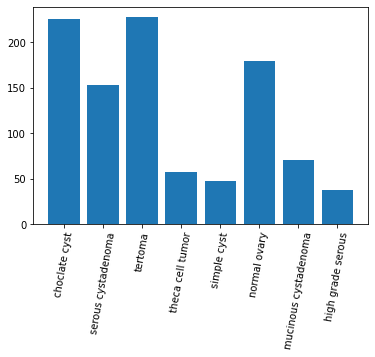

In [11]:
plt.bar(class_counts.index,class_counts.values )
plt.xticks(class_counts.index, [classes[i] for i in class_counts.index], rotation=80)

In [12]:
from PIL import Image

In [18]:
def show_binary(path):
    im = Image.open(path)
    arr = np.asarray(im)
    print(np.unique(arr))
    plt.imshow(arr == 1)

[0 1]


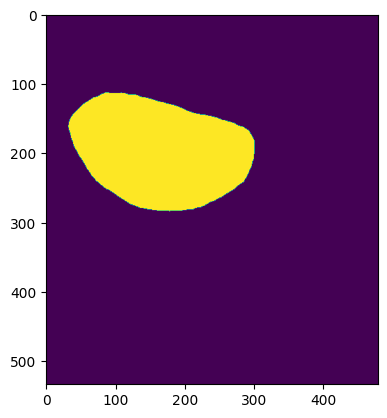

In [20]:
im1Path = "../../data/OTU_2d/annotations/232_binary_binary.PNG"
show_binary(im1Path)

[0 1]


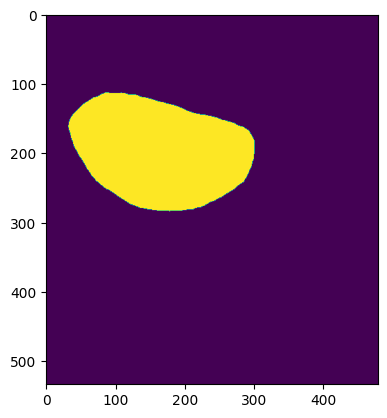

In [24]:
im2Path = "../data/OTU_2d/annotations/232_binary.PNG"
show_binary(im2Path)

In [15]:
# im3Path = "../data/OTU_2d/annotations/1.PNG"
# im3 = np.asarray(Image.open(im3Path))
# print(np.unique(im3))
# plt.imshow(im3)

In [12]:
! ls ../../data/OTU_2d/images | grep 367.JPG

1367.JPG
367.JPG


In [ ]:
1265-lbl

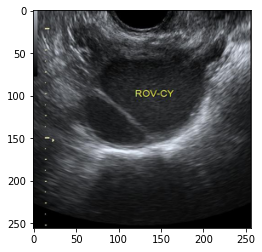

In [14]:
im3Path = "../../data/OTU_2d/images/1265.JPG"
plt.imshow(np.asarray(Image.open(im3Path).resize((256,256))))

In [15]:
im2Path = "../data/OTU_2d/images/1000.JPG"
plt.imshow(np.asarray(Image.open(im2Path)))

FileNotFoundError: [Errno 2] No such file or directory: '../data/OTU_2d/images/1000.JPG'

In [16]:
data = []

for p in (DATA_DIR/'images').iterdir():
    im = Image.open(str(p))
    width, height = im.size
    data.append((str(p), width, height))

In [17]:
df = pd.DataFrame(data, columns=['path', 'width', 'height'])

In [19]:

df.sort_values('width').tail()

,path,width,height
785,../../data/OTU_2d/images/822.JPG,1135,609
831,../../data/OTU_2d/images/1181.JPG,1135,597
528,../../data/OTU_2d/images/1187.JPG,1135,590
607,../../data/OTU_2d/images/1226.JPG,1135,592
397,../../data/OTU_2d/images/1224.JPG,1135,589


In [20]:
df.sort_values('height').tail()

,path,width,height
549,../../data/OTU_2d/images/672.JPG,1134,784
1258,../../data/OTU_2d/images/669.JPG,1135,785
124,../../data/OTU_2d/images/57.JPG,1099,793
29,../../data/OTU_2d/images/52.JPG,1071,794
768,../../data/OTU_2d/images/5.JPG,1096,794


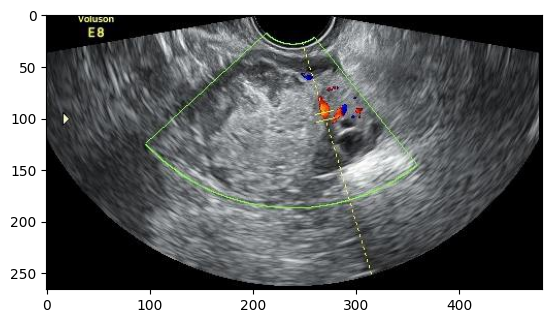

In [48]:
im = Image.open('../data/OTU_2d/images/441.JPG')
plt.imshow(im)

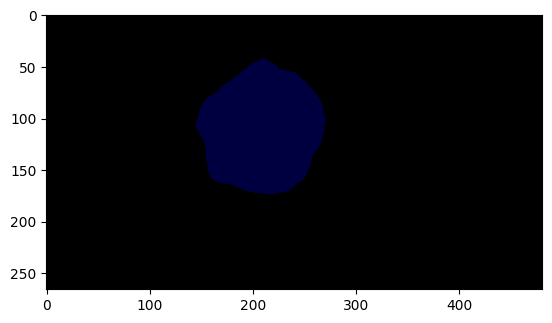

In [50]:
plt.imshow(Image.open('../data/OTU_2d/annotations/441.PNG'))
